In [6]:
import numpy as np

from utilities.cwt import *
from matplotlib import pyplot as plt


In [7]:
# Define parameters
duration = 10  # Duration of the signal in seconds
sampling_rate = 50  # Sampling rate in Hz

# Generate time vector
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

# Generate signal with varying frequencies
o_signal = np.sin(2 * np.pi * 3 * t) * (t <= 5) + np.sin(2 * np.pi * 5 * t) * ((t > 5) & (t<=7)) + np.sin(2 * np.pi * 1 * t) * (t > 7)

#plt.plot(t, o_signal)


dt = 0.02
33.0
[0.03553063 0.04225328 0.0502479  0.05975516 0.07106127 0.08450656
 0.10049581 0.11951033 0.14212253 0.16901313 0.20099161 0.23902066
 0.28424507 0.33802626 0.40198323 0.47804131 0.56849013 0.67605251
 0.80396646 0.95608263 1.13698027 1.35210502 1.60793291 1.91216526
 2.27396053 2.70421004 3.21586582 3.82433052 4.54792106 5.40842009
 6.43173165 7.64866104 9.09584213]
0.03553063331560067
multiplication took -0.0002830028533935547
(33, 500, 1)
invers fft took 0.00035500526428222656


/var/folders/38/7n1_2vzs5yj4rjtfy6_m6d_00000gn/T/ipykernel_21425/1632032081.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


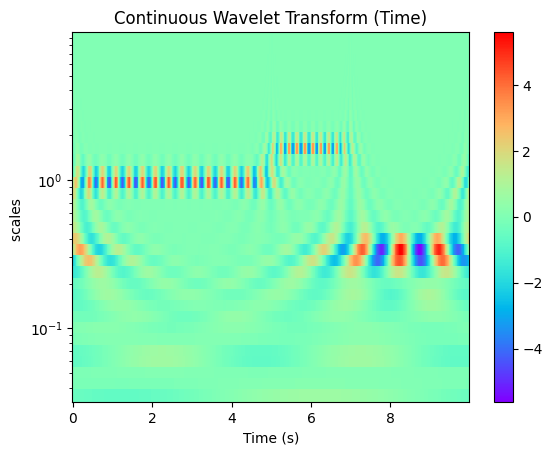

In [11]:

minFrq = 0.2
maxFrq = 24
minSpaceFrq = 0.002
maxSpaceFrq = 0.12
dt = 1/sampling_rate
dj = 0.25
print(f'dt = {dt}')
nf = 30
# logspace from paper implemenation 
ftime = np.logspace(np.log10(minFrq), np.log10(maxFrq), nf)
fspace = np.logspace(np.log10(minSpaceFrq), np.log10(maxSpaceFrq), nf)

wf = "morlet"
w0 = 8

s0 = (2*dt* (w0 + np.sqrt(2 + w0))) / (4 *np.pi)
J = np.ceil((1/dj )* np.log2((duration * sampling_rate * dt) / s0))
print(J)
scales = s0 * 2**(np.arange(J) *dj)
print(scales)

print(s0)

signal = o_signal[np.newaxis, : ]

transform = cwt_time_vec(signal, scales,w0, dt)

transform = np.squeeze(transform)

real_transform_values = transform.real

fig, axs = plt.subplots()
pcm = axs.pcolormesh(t, scales[::-1], real_transform_values, shading="nearest", cmap="rainbow")
axs.set_yscale("log")
axs.set_xlabel("Time (s)")
axs.set_ylabel("scales ")
axs.set_title("Continuous Wavelet Transform (Time)")
fig.colorbar(pcm, ax=axs)
fig.show()

(500,)


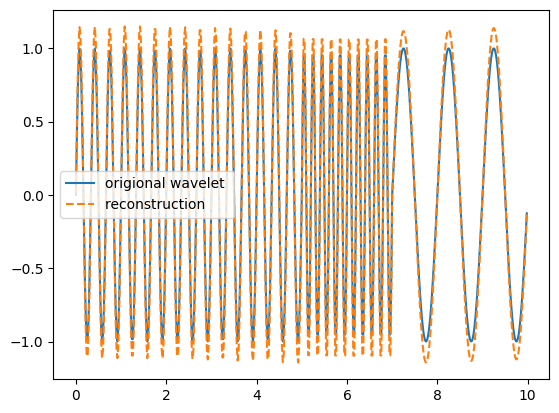

In [16]:

scales_graph = scales[np.newaxis,:]


inverse = transform / np.sqrt(scales_graph.T)
inverse = np.squeeze(np.sum(inverse, axis=0))

colorado_factor = ((dj) *np.sqrt(dt)) / (.7511 * .5758)
inverse_w_factor = colorado_factor * inverse
print(inverse.shape)



#plt.plot(t, inverse)
plt.plot(t, o_signal, label="origional wavelet ")
plt.plot(t, inverse_w_factor, label="reconstruction ", ls ="--")
plt.legend()
